In [3]:
import keras
import tensorflow as tf
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


Using TensorFlow backend.


In [4]:
from keras.datasets import cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_test.shape

(10000, 32, 32, 3)

In [9]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

In [10]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


In [11]:
label_dict = {0: 'airplane',1: 'automobile',2: 'bird',3: 'cat',4: 'deer',5: 'dog',6: 'frog',7: 'horse',8: 'ship',9: 'truck',}

Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


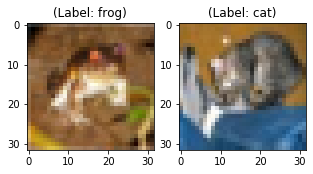

In [12]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))
# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))

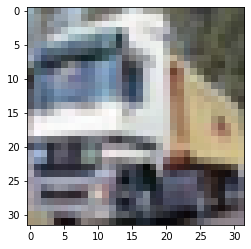

In [13]:
plt.imshow(x_train[1])

In [14]:
np.min(x_train),np.max(x_train)

(0, 255)

In [15]:
x_train = x_train/255.0

In [16]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [17]:
x_train.shape

(50000, 32, 32, 3)

In [18]:
#But before that, let's reshape the image dimensions from three to one (flatten the images)
x_train_flat = x_train.reshape(-1,3072)
print(x_train_flat.shape)

(50000, 3072)


In [19]:
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

In [20]:
df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

In [23]:
#df_cifar.head()

In [22]:
df_cifar.shape

(50000, 3072)

In [ ]:
from sklearn.decomposition import PCA

In [31]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

In [ ]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train

In [ ]:
principal_cifar_Df.head()

In [30]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))

Explained variation per principal component: [0.29076171 0.11252373]


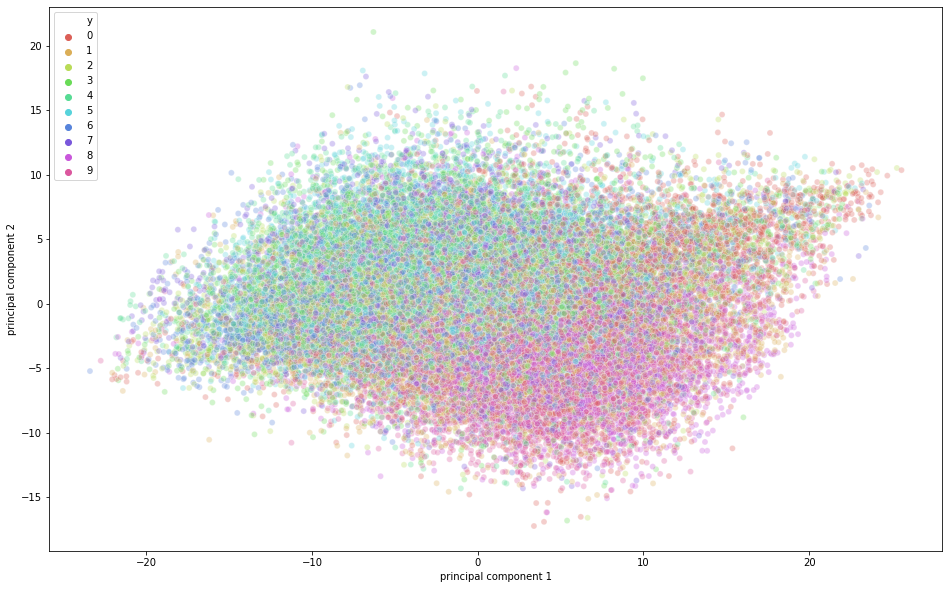

In [36]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)


In [37]:
x_test = x_test/255.0

In [38]:
x_test = x_test.reshape(-1,32,32,3)

In [39]:
x_test.shape

(10000, 32, 32, 3)

In [40]:
x_test_flat = x_test.reshape(-1,3072)

In [43]:
x_test_flat.shape

(10000, 3072)

In [49]:
pca = PCA(0.9)
pca

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
pca.fit(x__flat)


MemoryError: 

In [ ]:
pca.n_components_

In [ ]:
train_img_pca = pca.transform(x_train_flat)
test_img_pca = pca.transform(x_test_flat)

In [ ]:
a=2
aa